In [139]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats

#from kaggle eda
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [140]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

## The Data

There are two data sets included in the data folder: `Ames_Housing_Price_Data.csv` and `Ames_Real_Estate_Data.csv`.

The `Ames_Housing_Price_Data.csv` set contains $81$ data columns, including the key feature **SalePrice** which will be used as the target of the predictive/descriptive modeling. **PID** refers to the land parcel ID, which can merged on the *MapRefNo* column of the **Ames Accessor Data** (`Ames_Real_Estate_Data.csv`) to find the property address. Using a free service, such as **geopy**, we can find the long-lat coordinates of the houses.

The columns of the data are mostly attributes associated with the land and the houses. There are size related attributes, quality and condition attributes, house attachment attributes, etc.

To establish a foundation for your team's data analytics, we offer some insights on the house sizes vs. prices.

In [241]:
import numpy as np
import pandas as pd
%matplotlib inline 

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [142]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [285]:
housing['KitchenAbvGr'].describe()

count    2580.00000
mean        1.04031
std         0.20255
min         0.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         3.00000
Name: KitchenAbvGr, dtype: float64

In [286]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [143]:
housing['HouseStyle'].value_counts()

1Story    1288
2Story     773
1.5Fin     284
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

In [144]:
housing['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Gilbert    143
Somerst    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [145]:
housing['BldgType'].value_counts()

1Fam      2139
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: BldgType, dtype: int64

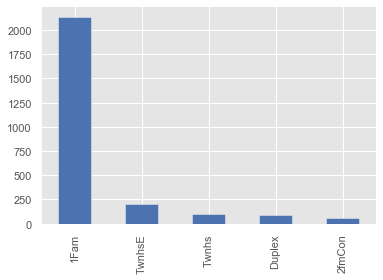

In [146]:
housing['BldgType'].value_counts().plot(kind='bar',y='count', color='b')


In [147]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [149]:
realestate = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col=0)
realestate.shape

(22213, 90)

In [150]:
realestate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [291]:
realestate.head(1)

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD \nOUTLOT V\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,481100,0,0,481100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [290]:
realestate["Neighborhood"].value_counts()

IOCondo    4100
N Ames     2022
OldTown     959
CollgCr     953
Edwards     889
NW Ames     732
IOC ISU     677
Sawyer      565
NRidgHt     552
Mitchel     531
SawyerW     513
Gilbert     477
Somerst     451
Crawfor     443
BrkSide     443
NoRidge     411
IDOT&RR     389
Timber      366
Wessex      294
ClearCr     269
HaydnLk     246
S&W ISU     203
GrnHill     192
Stonebr     168
HRCondo     154
Veenker     127
Blmngtn     122
DakotaR     121
MeadowV     112
Br'Dale     108
Bluestm      80
NoPkVil      78
Landmrk      61
MsCondo      33
WllwCr1      25
Greens       21
WllwCr2      18
Name: Neighborhood, dtype: int64

### How Does Price/SqrFt Play a Role in Housing Data Analytics?

In [152]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

In [153]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


In [154]:
size_related.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      14
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

### Performing Unary Feature Selection

In [155]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     7.306053e-313
1stFlrSF        1.616946e-300
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
2ndFlrSF         4.007008e-42
BsmtUnfSF        8.441921e-18
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64

In [156]:
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
corr

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,SalePrice
GrLivArea,1.000000,0.260322,0.385898,0.245993,0.410370,0.539135,0.665001,0.088931,0.476029,0.247716,0.321777,0.057935,0.719981
LotArea,0.260322,1.000000,0.103514,0.019984,0.222261,0.313086,0.022434,-0.000334,0.199159,0.155687,0.084963,0.052636,0.274443
MasVnrArea,0.385898,0.103514,1.000000,0.080349,0.360725,0.361919,0.129439,-0.053804,0.347454,0.149983,0.119097,-0.003637,0.498432
BsmtUnfSF,0.245993,0.019984,0.080349,1.000000,0.422157,0.303093,0.009690,0.048301,0.150678,-0.040390,0.116477,-0.032369,0.168060
TotalBsmtSF,0.410370,0.222261,0.360725,0.422157,1.000000,0.784271,-0.219782,-0.025286,0.465312,0.224190,0.214075,0.009407,0.652494
1stFlrSF,0.539135,0.313086,0.361919,0.303093,0.784271,1.000000,-0.264345,-0.009215,0.480196,0.224613,0.211429,0.076173,0.642613
2ndFlrSF,0.665001,0.022434,0.129439,0.009690,-0.219782,-0.264345,1.000000,0.005935,0.126284,0.087099,0.183689,-0.000226,0.263144
LowQualFinSF,0.088931,-0.000334,-0.053804,0.048301,-0.025286,-0.009215,0.005935,1.000000,-0.033235,-0.007544,-0.003367,-0.005239,-0.030835
GarageArea,0.476029,0.199159,0.347454,0.150678,0.465312,0.480196,0.126284,-0.033235,1.000000,0.239944,0.216076,0.026982,0.634669
WoodDeckSF,0.247716,0.155687,0.149983,-0.040390,0.224190,0.224613,0.087099,-0.007544,0.239944,1.000000,0.032639,0.080744,0.333232


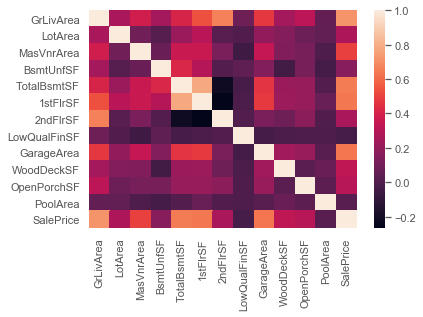

In [157]:
sns.heatmap(corr) #using seasborn imported above

### GrLivArea 

Most of the size related columns have significant p-values on their correlations with **SalePrice**. The **Gross Living Area** (GrLivArea) has a vanishing p-value, which indicates a very strong statistical relationship. We will focus our research on **GrLivArea**.


**question: what do they mean by vanishing p-value?**

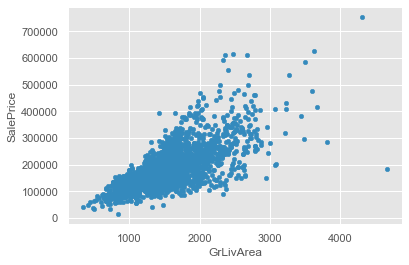

In [158]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')


In [159]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183732056699006

In [160]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

#slight better score with log of liv area

0.5400973491971155

In [161]:
lm.intercept_, lm.coef_

(2.442342023027404, array([0.88110363]))

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset (NA)

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [162]:
housing['SalePrice'].describe()

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

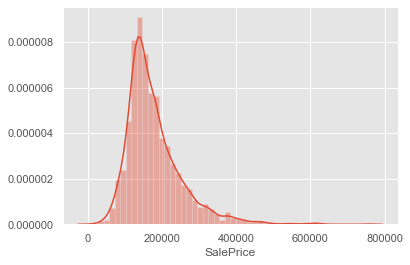

In [163]:
#histogram
sns.distplot(housing['SalePrice']);

In [164]:
#skewness and kurtosis
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 1.760802
Kurtosis: 5.432800


# Linear Regression

In [165]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

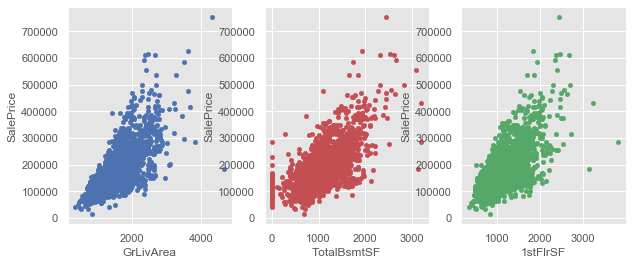

In [166]:
## load data into pandas dataframe
import pandas as pd
housing.head()
## Visualizing data, shown are Sales vs TV, Radio and Newspaper
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
housing.plot(ax=axes[0], kind='scatter', x='GrLivArea', y='SalePrice',c='b')
housing.plot(ax=axes[1], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='r')
housing.plot(ax=axes[2], kind='scatter', x='1stFlrSF', y='SalePrice',c='g')
plt.show()

- GrLivArea, TotalBsmtSF, and 1stFlrSF all seem to have a positive linear relationship with sales price

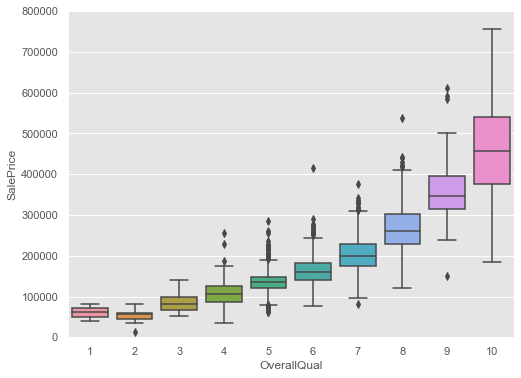

In [167]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#house prices increases when quality increases

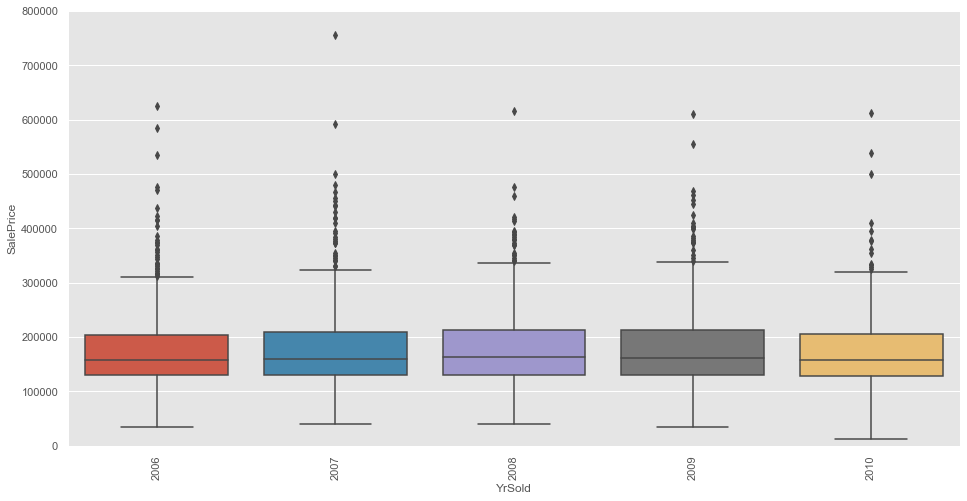

In [168]:
var = 'YrSold'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


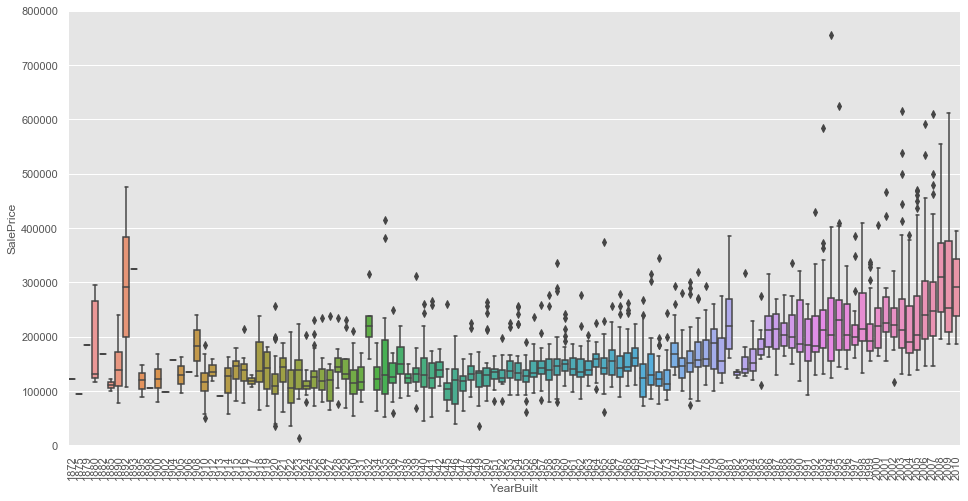

In [169]:
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#Although it's not a strong tendency, 
#SalePrice' increases for newer houses

In [170]:
# #scatterplot
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(housing[cols], size = 2.5)
# plt.show();

## Dealing with Missing Data

In [171]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,2571,0.996512
MiscFeature,2483,0.962403
Alley,2412,0.934884
Fence,2055,0.796512
FireplaceQu,1241,0.481008
LotFrontage,462,0.179070
GarageQual,129,0.050000
GarageYrBlt,129,0.050000
GarageFinish,129,0.050000
GarageCond,129,0.050000


In [172]:
# #dealing with missing data
# housing = housing.drop((missing_data[missing_data['Total'] > 1]).index,1)
# housing = housing.drop(housing.loc[housing['Electrical'].isnull()].index)
# housing.isnull().sum().max() #just checking that there's no missing data missing



1

In [243]:
#missing data
housing_na = housing.fillna(0.0)
housing_na.shape
housing_na.head()
#just checking that there's no missing data missing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,0.0,7890,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,0,0,0,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,0,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,0,0,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,0,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,0,0,0,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,0,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,0,0,0,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,0,0,0,0,11,2009,WD,Normal


In [174]:
#dealing with missing data
housing2 = housing.dropna(subset=['GrLivArea', 'TotalBsmtSF', '1stFlrSF'])
housing2.shape

(2576, 61)

In [175]:
housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']].mean()

GrLivArea      1486.276398
TotalBsmtSF    1036.916537
1stFlrSF       1145.213121
dtype: float64

In [176]:
## separate the input variables and output variables
X = housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']]  # input varialbe
Y = housing2['SalePrice']  # output variable
ols.fit(X, Y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, Y)))
print("Predicted Sale Price: %f" %(ols.predict([[1486, 1036, 1145]])))

Intercept: -27514.630461
Coefficients: [81.9441023  72.39014874  7.63773442]
R^2: 0.672112
Predicted Sale Price: 177995.705567


In [177]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.577000e+03,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2576.000000,2576.000000,2576.000000,2576.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2576.000000,2576.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,7.148966e+08,1486.047342,178047.880481,57.658130,10122.779589,6.045790,5.619325,1970.273962,1983.726814,444.442935,53.300854,539.172748,1036.916537,1145.116414,336.681412,4.249515,1.550252,0.377959,2.850601,1.040357,6.386108,0.604191,1.746894,466.835016,95.937136,46.121847,23.241366,2.514164,16.219247,1.663950,48.788126,6.150951,2007.839348
std,1.886590e+08,488.926708,75068.260932,42.807128,8130.656236,1.367689,1.122462,29.713830,20.488840,429.221385,174.516025,425.398470,418.494060,375.907373,424.155322,44.429215,0.545927,0.499172,0.823161,0.202664,1.535656,0.648779,0.738662,207.563063,129.109952,66.089442,64.140247,25.308514,56.855172,30.357005,499.012606,2.669145,1.312489
min,5.263011e+08,334.000000,12789.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129900.000000,20.000000,7407.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,214.750000,792.750000,872.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354551e+08,1436.000000,159900.000000,50.000000,9382.000000,6.000000,5.000000,1972.000000,1992.000000,384.500000,0.000000,448.000000,979.500000,1072.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,474.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209500.000000,70.000000,11500.000000,7.000000,6.000000,1999.000000,2003.000000,732.000000,0.000000,784.000000,1266.250000,1364.000000,703.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,4.000000,2.000000,6.000000,3.000000,13.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [178]:
housing.sample(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
109,534475100,1063,128000,20,RL,9920,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,HdBoard,HdBoard,TA,TA,CBlock,354.0,290.0,412.0,1056.0,GasA,TA,Y,SBrkr,1063,0,0,1,0,3,1,TA,6,Typ,0,1.0,280.0,Y,0,0,164,0,0,0,0,2,2010,WD,Normal
431,528142150,1760,269500,20,RL,12878,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,7,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,1262.0,0.0,498.0,1760.0,GasA,Ex,Y,SBrkr,1760,0,0,2,0,3,1,Gd,8,Typ,1,2.0,583.0,Y,165,190,0,0,0,0,0,6,2009,WD,Normal
236,906204180,2559,209000,60,RL,12128,Pave,IR1,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,4,1989,1989,Gable,CompShg,HdBoard,HdBoard,Gd,TA,CBlock,549.0,0.0,319.0,868.0,GasA,Ex,Y,SBrkr,1313,1246,0,2,1,4,1,Ex,9,Typ,1,2.0,506.0,Y,0,245,0,0,168,0,0,11,2006,WD,Abnorml
516,902301060,1510,87500,70,RM,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,4,1910,1950,Gable,CompShg,VinylSd,VinylSd,Gd,Gd,BrkTil,0.0,0.0,677.0,677.0,GasA,TA,Y,SBrkr,833,677,0,2,0,3,1,Gd,7,Typ,0,2.0,720.0,N,0,0,160,0,0,0,0,6,2009,WD,Normal
509,916386060,1444,174000,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0.0,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,2,1,3,1,TA,7,Typ,0,2.0,400.0,Y,100,0,0,0,0,0,0,4,2010,WD,Normal
147,528321010,2794,403000,60,RL,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,689.0,0.0,773.0,1462.0,GasA,Ex,Y,SBrkr,1490,1304,0,2,1,4,1,Ex,9,Typ,1,3.0,810.0,Y,0,146,202,0,0,0,0,7,2009,WD,Normal
397,902102060,1539,157500,70,RM,10440,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,8,1904,2002,Gable,CompShg,MetalSd,MetalSd,TA,TA,PConc,0.0,0.0,650.0,650.0,GasA,Gd,Y,SBrkr,958,581,0,2,0,3,1,Gd,8,Typ,1,2.0,686.0,P,70,78,68,0,0,0,0,6,2008,WD,Normal
441,914460110,1409,245000,20,RL,12864,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,1392.0,0.0,17.0,1409.0,GasA,Ex,Y,SBrkr,1409,0,0,1,1,1,1,Gd,4,Typ,1,2.0,576.0,Y,0,144,0,0,145,0,0,7,2007,WD,Normal
234,905104030,913,129000,85,RL,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,187.0,627.0,0.0,814.0,GasA,Gd,Y,SBrkr,913,0,0,1,0,3,1,TA,6,Typ,0,1.0,240.0,Y,0,0,252,0,0,0,0,5,2007,WD,Normal
360,905451320,1144,129000,20,RL,9571,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1956,1956,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,739.0,0.0,405.0,1144.0,GasA,TA,Y,SBrkr,1144,0,0,1,0,3,1,TA,6,Typ,0,1.0,596.0,Y,44,0,0,0,0,0,0,6,2010,WD,Normal


### categorical input variables

In [209]:
#Practicing Dumifying variables 
# may want to dumify neighborhood

# Kitchen Quality 

# KitchenQual_dummy = pd.get_dummies(housing['KitchenQual'])
# KitchenQual_dummy.head()


In [208]:
#KitchenQual_dummy.drop('Ex', 1)

In [207]:
#pd.DataFrame(housing.columns, columns=['Column_Name'])

In [272]:
X = housing_na.filter(regex='SF$|Area$')
y = housing_na['SalePrice']

X.columns

Index(['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea'],
      dtype='object')

In [273]:
from sklearn.model_selection import train_test_split
# np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)


In [274]:
ols.fit(X, y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, y)))
# print("Predicted Sale Price: %f" %(ols.predict([[1486, 1036, 1145]])))



Intercept: -21035.325464
Coefficients: [ 32.02253264   0.17789347  52.02776045 -23.45416583  66.90612375
  30.39223821  33.82747245 -32.19717803  76.55641347  40.15655349
  49.90911546 -35.31401226]
R^2: 0.756813


#### dealing with outliers


In [185]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(housing_na['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.20247416]
 [-1.90787898]
 [-1.90654663]
 [-1.90240304]
 [-1.84925573]
 [-1.8399293 ]
 [-1.77331196]
 [-1.75332676]
 [-1.70669463]
 [-1.68004769]]

outer range (high) of the distribution:
[[4.75518689]
 [4.7951573 ]
 [5.02165624]
 [5.41469851]
 [5.50912193]
 [5.75444692]
 [5.77652391]
 [5.82106426]
 [5.95429893]
 [7.68634965]]


In [186]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()

ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))


R^2 for train set: 0.745573
--------------------------------------------------
R^2 for test  set: 0.742067


In [187]:
import pandas as pd

## separate the input variables and output variables
X1 = housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']]  # input varialbe
y1 = housing2['SalePrice']  # output variable

X1.describe()

,GrLivArea,TotalBsmtSF,1stFlrSF
count,2576.000000,2576.000000,2576.000000
mean,1486.276398,1036.916537,1145.213121
std,488.883322,418.494060,375.948293
min,334.000000,0.000000,334.000000
25%,1112.000000,792.750000,872.000000
50%,1436.000000,979.500000,1072.000000
75%,1733.250000,1266.250000,1364.000000
max,4676.000000,3206.000000,3820.000000


In [188]:
# try:  # train_test_split was moved in 0.18.0
#     from sklearn.model_selection import train_test_split
# except:  # Following import works through 0.19 but outputs a warning in 0.18
#     from sklearn.cross_validation import train_test_split
# X1_train, X1_test, y1_train, y1_test = train_test_split(housing2, y1, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
# np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42, test_size=0.2)




In [189]:
#### Your code here
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()

ols.fit(X1_train, y1_train)

print("R^2 for train set: %f" %ols.score(X1_train, y1_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X1_test, y1_test))



R^2 for train set: 0.680305
--------------------------------------------------
R^2 for test  set: 0.635768


In [190]:
# lasso
from sklearn.linear_model import Lasso

lasso = Lasso(normalize = True, alpha = 1e-4)
lasso.fit(X1, y1)

for ftname, beta in zip( X1.columns, lasso.coef_ ):
    print( f"{ftname}>> {beta}")

GrLivArea>> 81.94409740244672
TotalBsmtSF>> 72.39019979303063
1stFlrSF>> 7.637679777891398


In [191]:
#ridge
from sklearn.linear_model import Ridge

ridge = Ridge(normalize = True, alpha = 1e-4)
ridge.fit(X1, y1)

for ftname, beta in zip( X1.columns, ridge.coef_ ):
    print( f"{ftname}>> {beta}")

GrLivArea>> 81.93271649584663
TotalBsmtSF>> 72.3722872725338
1stFlrSF>> 7.66054857469576


In [192]:
# Detecting Multicollinearity Among Features


In [193]:
housing2.sample(3)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
236,906392110,1498,237000,20,RL,11645,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,24.0,0.0,1474.0,1498.0,GasA,Ex,Y,SBrkr,1498,0,0,2,0,3,1,Gd,7,Typ,1,3.0,844.0,Y,144,98,0,0,0,0,0,3,2009,WD,Normal
815,907250070,1611,250000,20,RL,11664,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,1234.0,0.0,335.0,1569.0,GasA,Ex,Y,SBrkr,1611,0,0,2,0,3,1,Gd,6,Typ,0,3.0,1231.0,Y,262,93,0,0,0,0,0,9,2009,WD,Normal
804,909176140,1691,127000,50,RL,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,TA,TA,BrkTil,218.0,0.0,808.0,1026.0,GasA,TA,Y,SBrkr,1026,665,0,2,0,3,1,Gd,6,Typ,1,1.0,308.0,Y,0,0,242,0,0,0,0,5,2010,WD,Normal


In [194]:
continuous_features.sample(3).astype('float')

,GrLivArea,LotArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
320,1720.0,11645.0,860.0,860.0,860.0,860.0,0.0,565.0,0.0,70.0,0.0
733,2071.0,15584.0,825.0,825.0,2071.0,0.0,0.0,336.0,131.0,28.0,0.0
462,2168.0,8660.0,760.0,760.0,928.0,928.0,312.0,576.0,467.0,160.0,0.0


In [195]:
# continuous_features = housing2.filter(regex='SF$|Area$')
# continuous_features = continuous_features.sample(3).astype('float')
# scores = {}
# ols2 = LinearRegression()
# from sklearn.metrics import r2_score
# for feature_name in continuous_features:
#                 housing3     = housing2.copy()
#                 feature = housing3[feature_name].copy()
#                 housing3.drop(feature_name, axis=1, inplace=True)
#                 ols2.fit(housing3, feature)
#                 scores[feature_name] = ols2.score(housing3, feature)   

### Beyond Basic EDA
(B) Isabel

How is GrLivArea engineered from the other area-related feature? If you would design a gross area feature (to replace GrLivArea) for the purpose of descriptive modeling, what would you do? What are the pros and cons when aggregating several features together?

Do home buyers value upstairs bathrooms and basement bathrooms equally? Do they price 'half-bath' as one half of a full bath? Based on your finding, how would you design an aggregate bathroom feature?

- 'TotalBsmtSF' = BsmtFinSF1' + 'BsmtFinSF2' + 'BsmtUnfSF'  

- 'GrLivArea' =  '1stFlrSF' + '2ndFlrSF' + LowQualFinSF' 



In [196]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [197]:
print(sum(housing['TotalBsmtSF'].fillna(0.0)))
sum(housing['BsmtFinSF1'].fillna(0.0))+ sum(housing['BsmtFinSF2'].fillna(0.0)) + sum(housing['BsmtUnfSF'].fillna(0.0))  # We fill the very minor missing values by 0.0



2671097.0


2671097.0

In [198]:
print(sum(housing['GrLivArea'].fillna(0.0)))
sum(housing['1stFlrSF'].fillna(0.0))+sum(housing['2ndFlrSF'].fillna(0.0))+sum(housing['LowQualFinSF'].fillna(0.0))


3829544


3829544

In [279]:
X_GL = housing2[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotalBsmtSF']]  # input varialbe
Y_GL = housing2['SalePrice']  # output variable
ols.fit(X_GL, Y_GL)

print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X_GL, Y_GL)))


Intercept: -28121.669255
Coefficients: [-1.17199005e+15  1.17199005e+15  1.17199005e+15  1.17199005e+15
  7.18325336e+01]
R^2: 0.676782


In [280]:
housing2['BsmtUnfSF']

1       618.0
2       104.0
3       100.0
4       405.0
5       167.0
6         0.0
7       936.0
8      1146.0
9       217.0
10       80.0
11     1318.0
12      166.0
13      861.0
14      785.0
15      726.0
16      284.0
17      349.0
18      823.0
19      410.0
20        0.0
21     1461.0
22      516.0
23      188.0
24     1240.0
25      225.0
26      608.0
27     1450.0
28      378.0
29      216.0
30      564.0
31      190.0
32     1246.0
33     1324.0
34      833.0
35      363.0
36     1258.0
37      342.0
38       76.0
39      692.0
40      263.0
41     1519.0
42      748.0
43      675.0
44      744.0
45      736.0
46     1158.0
47      847.0
48      476.0
49      357.0
50      440.0
        ...  
714       0.0
715       0.0
716     190.0
717     150.0
718       0.0
719     588.0
720     219.0
721    1560.0
722     639.0
723     484.0
724    1768.0
725    1078.0
726     208.0
727     148.0
728     548.0
729     297.0
730     357.0
731     236.0
732     813.0
733     322.0
734   

In [278]:
corr2 = pd.concat([size_related, housing['GrLivArea']], axis=1).corr()
corr2

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,GrLivArea
GrLivArea,1.000000,0.260322,0.385898,0.245993,0.410370,0.539135,0.665001,0.088931,0.476029,0.247716,0.321777,0.057935,1.000000
LotArea,0.260322,1.000000,0.103514,0.019984,0.222261,0.313086,0.022434,-0.000334,0.199159,0.155687,0.084963,0.052636,0.260322
MasVnrArea,0.385898,0.103514,1.000000,0.080349,0.360725,0.361919,0.129439,-0.053804,0.347454,0.149983,0.119097,-0.003637,0.385898
BsmtUnfSF,0.245993,0.019984,0.080349,1.000000,0.422157,0.303093,0.009690,0.048301,0.150678,-0.040390,0.116477,-0.032369,0.245993
TotalBsmtSF,0.410370,0.222261,0.360725,0.422157,1.000000,0.784271,-0.219782,-0.025286,0.465312,0.224190,0.214075,0.009407,0.410370
1stFlrSF,0.539135,0.313086,0.361919,0.303093,0.784271,1.000000,-0.264345,-0.009215,0.480196,0.224613,0.211429,0.076173,0.539135
2ndFlrSF,0.665001,0.022434,0.129439,0.009690,-0.219782,-0.264345,1.000000,0.005935,0.126284,0.087099,0.183689,-0.000226,0.665001
LowQualFinSF,0.088931,-0.000334,-0.053804,0.048301,-0.025286,-0.009215,0.005935,1.000000,-0.033235,-0.007544,-0.003367,-0.005239,0.088931
GarageArea,0.476029,0.199159,0.347454,0.150678,0.465312,0.480196,0.126284,-0.033235,1.000000,0.239944,0.216076,0.026982,0.476029
WoodDeckSF,0.247716,0.155687,0.149983,-0.040390,0.224190,0.224613,0.087099,-0.007544,0.239944,1.000000,0.032639,0.080744,0.247716


Do home buyers value upstairs bathrooms and basement bathrooms equally? Do they price 'half-bath' as one half of a full bath? Based on your finding, how would you design an aggregate bathroom feature?
- 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'

‘Bathrooms’ = BsmtFullBath + BsmtHalfBath * 0.5 + FullBath + HalfBath * 0.5


‘Bathrooms’ = FullBath + HalfBath(0.5) + BsmtFullBath(.6) + BsmtHalfBath(0.2) 



In [199]:
housing_bath2 = housing.fillna(0.0)
housing_bath2 = housing_bath


In [200]:
## separate the input variables and output variables
X2 = housing_bath[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]  # input varialbe
y2 = housing_bath['SalePrice']  # output variable

X2.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
1,1.0,0.0,1,0
2,1.0,0.0,2,0
3,0.0,0.0,1,0
4,0.0,0.0,1,0
5,1.0,0.0,2,1


In [201]:
ols.fit(X2, y2)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))


Intercept: 36411.467820
Coefficients: [46581.74474426 16327.75872485 69639.06554285 32755.7538322 ]


- 'BsmtFullBath', 46581.74 
- 'BsmtHalfBath', 16327.75
- 'FullBath', 69639.06
- 'HalfBath' 32755.75

In [248]:
housing_na['HalfBath2'] = housing_na['HalfBath'].fillna(0.0)*0.5
housing_na['BsmtFullBath2'] = housing_na['BsmtFullBath'].fillna(0.0)*.6 
housing_na['BsmtHalfBath2'] = housing_na['BsmtHalfBath'].fillna(0.0)*.2

In [249]:
housing_na['bathroom'] = housing_na['FullBath'] + housing_na['HalfBath2'] + housing_na['BsmtFullBath2'] + housing_na['BsmtHalfBath2']

#FullBath + HalfBath(0.5) + BsmtFullBath(.6) + BsmtHalfBath(0.2)



In [233]:
housing_na['bathroom'].sample(10)

746    2.5
418    1.6
662    2.2
683    1.6
321    3.1
455    2.6
875    3.1
136    1.6
264    2.6
246    2.5
Name: bathroom, dtype: float64

In [120]:
46581.74 * .4

18632.696

In [111]:
 69639.06 * .5

34819.53

In [112]:
32755.75/69639.06

0.4703646200853372

In [115]:
16327.75/46581.74

0.3505182502843389

In [113]:
46581.74/69639.06

0.6689024808778292

In [121]:
16327.75/69639.06

0.23446252720815014

In [114]:
(69639.06-46581.74)/46581.74

0.49498623280281073

In [244]:
housing_na["BsmtFin"] =  housing_na['BsmtFinSF1'] + housing_na['BsmtFinSF2']

In [282]:
housing_na["BsmtFin"]

1       238.0
2       945.0
3       737.0
4         0.0
5       643.0
6         0.0
7         0.0
8         0.0
9       647.0
10      467.0
11       24.0
12      458.0
13        0.0
14      609.0
15      810.0
16      602.0
17      925.0
18       41.0
19     1200.0
20      384.0
21        0.0
22      273.0
23      358.0
24        0.0
25      300.0
26        0.0
27       16.0
28      378.0
29      891.0
30     1430.0
31        0.0
32        0.0
33        0.0
34        0.0
35      906.0
36       78.0
37      500.0
38      416.0
39      156.0
40      725.0
41        0.0
42      336.0
43      637.0
44      181.0
45        0.0
46        0.0
47        0.0
48      292.0
49      579.0
50        0.0
        ...  
714     700.0
715     570.0
716     883.0
717     714.0
718    1060.0
719     700.0
720     651.0
721       0.0
722     870.0
723     399.0
724       0.0
725       0.0
726    1270.0
727     632.0
728     141.0
729       0.0
730     329.0
731     809.0
732       0.0
733     606.0
734   

In [259]:
housing_na.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [261]:
housing_na.dtypes

PID                int64
GrLivArea          int64
SalePrice          int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64


In [275]:
# Xx = housing_na[['GrLivArea','LotFrontage', 'LotArea',
#                 'Alley', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
#         'bathroom','BedroomAbvGr', 'KitchenAbvGr',
#        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
#        'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'BsmtFin']].astype('float')
# yy = housing_na['SalePrice']

# Xx.head()



In [276]:
# from sklearn.model_selection import train_test_split
# # np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
# Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, random_state = 42, test_size=0.2)




# #### Your code here
# from sklearn.linear_model import LinearRegression 

# ols = LinearRegression()

# ols.fit(Xx_train, yy_train)

# print("R^2 for train set: %f" %ols.score(Xx_train, yy_train))

# print('-'*50)

# print("R^2 for test  set: %f" %ols.score(Xx_test, yy_test))



In [277]:
# # lasso
# from sklearn.linear_model import Lasso

# lasso = Lasso(normalize = True, alpha = 1e-4)
# lasso.fit(Xx, yy)

# for ftname, beta in zip( X1.columns, lasso.coef_ ):
#     print( f"{ftname}>> {beta}")

In [354]:
# Function to get Latitude and Longitude

from geopy.geocoders import Nominatim
# location = geolocator.geocode("2400 SE 16TH ST AMES, IA")

def get_lat_log(address):
    geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36")
    geocode = lambda query: geolocator.geocode("%s, AMES IA" % query)
    location = geocode(address)
    
    if location == None:
        return None 
    
    return (location.latitude, location.longitude)

In [ ]:
# # Function to get distance from schools
# from geopy.distance import geodesic

# def get_school_dist(address, school):
#     lat_log = get_lat_log(address)
#     school = get_lat_log(school)
    
#     return(geodesic(lat_log, school).miles)

In [378]:
# Function to get distance from schools
from geopy.distance import geodesic

def get_school_dist(lat_log, school_lat_log):
    """ Get School Distance
    :lat_log - tuple, address lat and log
    :school_lst_log -tuple, school lat and log
    Return: distance between both addresses
    """
    return(geodesic(lat_log, school_lat_log).miles)

In [374]:
#saving 
#covert dict to json
import json

def to_json_string(list_dict):
    ''' converts dict to json'''
    if list_dict is None or list_dict == []:
        return '[]'
    return json.dumps[list_dict]

#save json to json file
def save_to_file(ListObj_dict, name):
    ''' write into a .json file'''
    with open(name + '.json', 'w') as f:
        f.write(to_json_string(ListObj_dict))
    print(f'Saved to {name}.json')
    

##### for loop to get two lists for distance to highschool and distance to Iowa State

In [ ]:
from time import sleep


addresses = realestate["Prop_Addr"]

total_addresses = len(addresses)
count = 0
none_count_hs = 0
none_count_c = 0

high_school = "Ames High School 1921 Ames High Drive Ames, IA 50010"
hs_lat_log = get_lat_log(high_school)

college = "100 Enrollment Services Ctr"
c_lat_log = get_lat_log(college)

address_lat_log = []
highschool_dist = []
college_dist = []

for address in addresses:
    sleep(.25)
    lat_log = get_lat_log(address)
    address_lat_log.append(lat_log)
    
    dist_hs = get_school_dist(lat_log, hs_lat_log)
    if dist_hs is None:
        dist_hs = 0
        non_count_hs += 1
    highschool_dist.append(dist_hs) 
    
    sleep(.25)
    dist_c = get_school_dist(lat_log, c_lat_log)
    if dist_c is None:
        dist_c = 0
        non_count_c += 1
    college_dist.append(dist_c)
    
    
    count += 1
    print(f"On address {count} out of {total_addresses}")
    print(f"Got None: High School: {none_count_hs} college: {none_count_c}")

print("Done!")

save_to_file(address_lat_log, "address_lat_log")
save_to_file(highschool_dist, "highschool_dist")
save_to_file(college_dist, "college_dist")


On address 1 out of 22213
Got None: High School: 0 college: 0
On address 2 out of 22213
Got None: High School: 0 college: 0
On address 3 out of 22213
Got None: High School: 0 college: 0
On address 4 out of 22213
Got None: High School: 0 college: 0
On address 5 out of 22213
Got None: High School: 0 college: 0
On address 6 out of 22213
Got None: High School: 0 college: 0
On address 7 out of 22213
Got None: High School: 0 college: 0
On address 8 out of 22213
Got None: High School: 0 college: 0
On address 9 out of 22213
Got None: High School: 0 college: 0
On address 10 out of 22213
Got None: High School: 0 college: 0
On address 11 out of 22213
Got None: High School: 0 college: 0
On address 12 out of 22213
Got None: High School: 0 college: 0
On address 13 out of 22213
Got None: High School: 0 college: 0
On address 14 out of 22213
Got None: High School: 0 college: 0
On address 15 out of 22213
Got None: High School: 0 college: 0
On address 16 out of 22213
Got None: High School: 0 college: 0
O

In [359]:
get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")

(42.0403449, -93.634264)

In [326]:
"4599 GEORGE W CARVER AVE, AMES, IA 50010"

'4599 george w carver ave, ames, ia 50010'

In [ ]:
#1. get long and lat based on address 
#2. put that into a new column 
#3. Merge Datasets to have long and lat and neighborhood data in housing df 
#4. figure out distance to schools 
#5. Neighborhood differences 

In [349]:
realestate.head(5)

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD \nOUTLOT V\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,481100,0,0,481100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:17 \n AMES,5,45,HAPPE HOMES LLP,NaN,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,NaN,2020.0,5.0,2020-04989,2020.0,5.0,WRD,4400,0,0,4400,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,SCENIC VALLEY SD 4TH ADD \nOUTLOT F\n AMES,5,45,SCENIC VALLEY PROPERTY OWNERS ASSOCIATION INC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2020.0,4.0,2020-03063,2020.0,4.0,WRD,7100,0,0,7100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:19 \n AMES,5,45,HAPPE HOMES LLP,NaN,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,NaN,2019.0,10.0,2019-10001,2019.0,10.0,WRD,7200,0,0,7200,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [360]:
get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")

(42.0403449, -93.634264)

In [361]:
get_lat_log("100 Enrollment Services Ctr")

(42.02508005, -93.64910536181984)

In [363]:
from geopy.distance import geodesic
location = get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")
High_School = get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")
Iowa_State = get_lat_log("100 Enrollment Services Ctr")
print(geodesic(location, High_School).miles)
print(geodesic(location, Iowa_State).miles)

0.0
1.3012086456488512
